## Análisis de Grandes Volúmenes de datos
## Tarea 03
## Daniel Ricardo Ramírez Umaña


Se importan las librerías por utilizar

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Se lee el dataset y se hace una pequeña observación de su contenido

In [3]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head(15)

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


## 1. [5%] Una breve descripción del problema planteado y una justificación del enfoque a utilizar.

Se cuenta con un dataset con información de clientes de una firma de supermercsados. Lo que se busca es aplicar clustering con el fin de poder estudiar el comportamiento de estos clientes en grupos y analizar qué es lo que los lleva a estar en dicha agrupación. La razón del uso de este modelo no supervisado es que desconocemos patrones entre los clientes y nos gustaría poder encontrar algo que pueda ser de gran valor para la firma de supermercados y de esta forma poder hacer toma de decisiones bien fundamentadas.

## 2. [10%] Un apartado que muestre el uso de al menos dos técnicas de exploración de datos y su interpretación sobre las características del data set elegido.

Primero sería interesante observar si existe algún tipo de coorelación entre la edad de una persona y los ingresos que esta tiene. Esto nos podría dar una idea de cual odría ser el grupo hacia el que más se podría enfocar el mercado.

In [34]:
# create dataframe
df_temp = pd.DataFrame({'Year_Birth': data.Year_Birth,
                   'Income': data.Income})
  
# use groupby() to compute mean
df_temp.groupby(['Year_Birth']).mean()
df_temp = df_temp.sort_values(by=['Year_Birth'])

print(f"\n***********************\n{df_temp}\n***********************\n")


***********************
      Year_Birth   Income
239         1893  60182.0
339         1899  83532.0
192         1900  36640.0
1950        1940  51141.0
424         1941  93027.0
...          ...      ...
747         1995  71163.0
1850        1995  83257.0
696         1995  34824.0
1170        1996  14421.0
46          1996   7500.0

[2240 rows x 2 columns]
***********************



<AxesSubplot:xlabel='Year_Birth', ylabel='Income'>

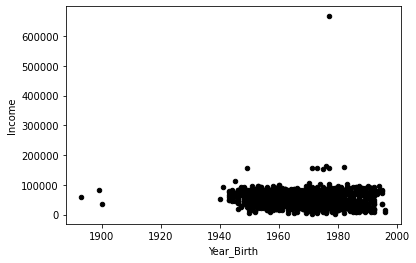

In [35]:
data.plot(x='Year_Birth', y='Income', kind = 'scatter', color = 'black', alpha = 1)

<AxesSubplot:xlabel='Year_Birth', ylabel='Income'>

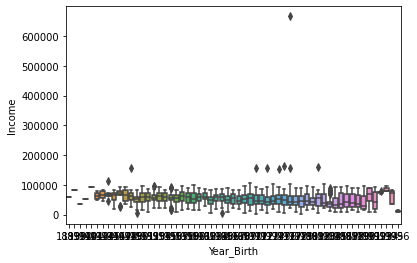

In [36]:
sns.boxplot( x=data["Year_Birth"], y=data["Income"] )

Ahora bien, también podría ser interesante estudiar el comportamiento de el estado civil del cliente con respecto a su ingreso.

In [38]:
# create dataframe
df_temp = pd.DataFrame({'Marital_Status': data.Marital_Status,
                   'Income': data.Income})
  
# use groupby() to compute mean
df_temp.groupby(['Marital_Status']).mean()
df_temp = df_temp.sort_values(by=['Marital_Status'])

print(f"\n***********************\n{df_temp}\n***********************\n")


***********************
     Marital_Status   Income
2134         Absurd  65487.0
2093         Absurd  79244.0
153           Alone  34176.0
138           Alone  35860.0
131           Alone  61331.0
...             ...      ...
989           Widow  35340.0
1548          Widow  66033.0
1460          Widow  64866.0
2202           YOLO  48432.0
2177           YOLO  48432.0

[2240 rows x 2 columns]
***********************



<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

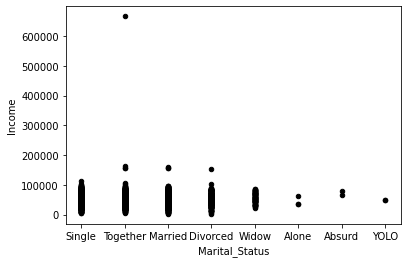

In [39]:
data.plot(x='Marital_Status', y='Income', kind = 'scatter', color = 'black', alpha = 1)

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

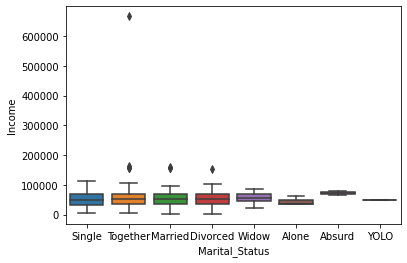

In [41]:
sns.boxplot( x=data["Marital_Status"], y=data["Income"] )

## 3. [5%] Un apartado que muestre la justificación y uso de al menos una técnica de preprocesamiento y limpieza de datos y su interpretación sobre el resultado obtenido al aplicar dicha técnica.

## 4. [15%] Un apartado que muestre la justificación y uso de al menos dos técnicas de transformación de datos, selección y extracción de atributos y su interpretación sobre el resultado obtenido al aplicar dichas técnicas.

## 5. [40%] Un apartado que muestre el uso y los resultados de aplicar técnicas de segmentación o análisis de asociación para resolver el problema planteado. Explique brevemente cómo dichas técnicas le ayudan a resolver el problema que se planteó inicialmente.

## 6. [10%] Un apartado que muestre la justificación y el uso de al menos una técnica de evaluación de modelos incluyendo resultados parciales durante la selección de parámetros o hiper parámetros que requieran las técnicas seleccionadas.

## 7. [10%] Un apartado que muestre los resultados obtenidos incluyendo al menos una gráfica (y si es posible, al menos una tabla con comparaciones numéricas) y su interpretación sobre los resultados obtenidos.

## 8. [5%] Un breve análisis con la respuesta a a la(s) pregunta(s) que se planteó. Puede indicar si los resultados obtenidos ayudan a responder total, parcialmente, o de ninguna manera, su(s) pregunta(s) de investigación.